IMPORT THE DEPENDENCIES

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
from glob import glob
from tqdm import tqdm
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import load_img

In [24]:
#LOAD THE DATA HERE 
train_dir = 'C:/Users/user/Desktop/GOMYCODE/FER PROJECT/train/train/'
test_dir = 'C:/Users/user/Desktop/GOMYCODE/FER PROJECT/test/test/'

In [25]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(os.path.join(directory,label)):
            image_path=os.path.join(directory,label,filename)
            image_paths.append(image_path)
            labels.append(label)
        
    return image_paths, labels

In [26]:
# convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(train_dir)
train.head()

,image,label
0,C:/Users/user/Desktop/GOMYCODE/FER PROJECT/tra...,angry
1,C:/Users/user/Desktop/GOMYCODE/FER PROJECT/tra...,angry
2,C:/Users/user/Desktop/GOMYCODE/FER PROJECT/tra...,angry
3,C:/Users/user/Desktop/GOMYCODE/FER PROJECT/tra...,angry
4,C:/Users/user/Desktop/GOMYCODE/FER PROJECT/tra...,angry


In [27]:
test = pd.DataFrame()
test['image'], test['label']= load_dataset(test_dir)
test.head()

,image,label
0,C:/Users/user/Desktop/GOMYCODE/FER PROJECT/tes...,angry
1,C:/Users/user/Desktop/GOMYCODE/FER PROJECT/tes...,angry
2,C:/Users/user/Desktop/GOMYCODE/FER PROJECT/tes...,angry
3,C:/Users/user/Desktop/GOMYCODE/FER PROJECT/tes...,angry
4,C:/Users/user/Desktop/GOMYCODE/FER PROJECT/tes...,angry


<Axes: xlabel='label', ylabel='count'>

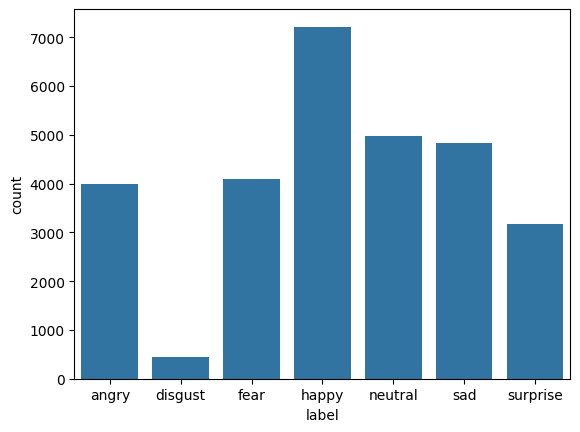

In [28]:
#Exploratory DA
sns.countplot(data=train, x='label')

In [29]:
#Feature Extraction

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image)
        img_array = np.array(img) / 255.0  # Normalize pixel values
        features.append(img_array)

    features = np.array(features)
    print("Original shape:", features.shape)

    try:
        features = features.reshape(len(features), 48, 48, 3)
        print("Reshaped successfully.")
    except ValueError as e:
        print(f"Error during reshape: {e}")

    return features

In [30]:
train_features = extract_features(train['image'])

100%|██████████| 28709/28709 [00:59<00:00, 486.52it/s]


Original shape: (28709, 48, 48, 3)
Reshaped successfully.


In [31]:
test_features = extract_features(test['image'])

100%|██████████| 7178/7178 [00:12<00:00, 585.02it/s]


Original shape: (7178, 48, 48, 3)
Reshaped successfully.


In [32]:
X_train = train_features
X_test = test_features

In [18]:
## Label Encod here
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['label'])

y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [19]:
y_train = to_categorical(y_train,num_classes=7)
y_test = to_categorical(y_test,num_classes=7)

In [20]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0.])

In [21]:
input_shape = (48,48,3)
output_class = 7

In [22]:
model = Sequential()

# Convolutional block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(output_class, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,234,503 (16.15 MB)

 Trainable params: 4,234,503 (16.15 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [76]:
history = model.fit(x=X_train, y=y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 1690s 4s/step - accuracy: 0.2473 - loss: 1.8343 - val_accuracy: 0.2471 - val_loss: 1.8140
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 2270s 5s/step - accuracy: 0.2516 - loss: 1.8131 - val_accuracy: 0.2471 - val_loss: 1.8129
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 1828s 4s/step - accuracy: 0.2504 - loss: 1.8103 - val_accuracy: 0.2491 - val_loss: 1.7958
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 1751s 4s/step - accuracy: 0.2584 - loss: 1.7820 - val_accuracy: 0.2888 - val_loss: 1.7168
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 2213s 5s/step - accuracy: 0.2953 - loss: 1.7180 - val_accuracy: 0.3601 - val_loss: 1.5988
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 2470s 5s/step - accuracy: 0.3471 - loss: 1.6387 - val_accuracy: 0.4126 - val_loss: 1.5041
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 1733s 4s/step - accuracy: 0.3906 - loss: 1.5606 - val_accuracy: 0.4503 - val_loss: 1.4291
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 1685s 4s/step - accuracy: 0.4104 - loss: 1.5096 - 

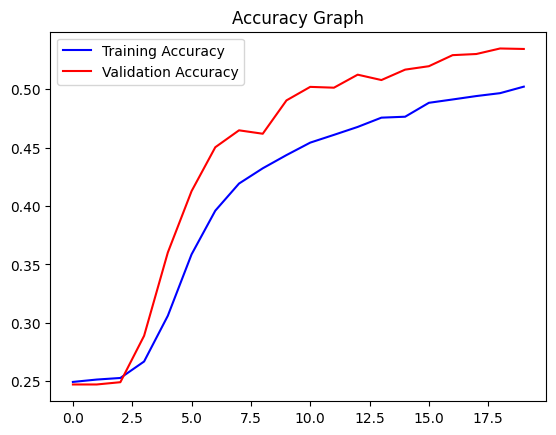

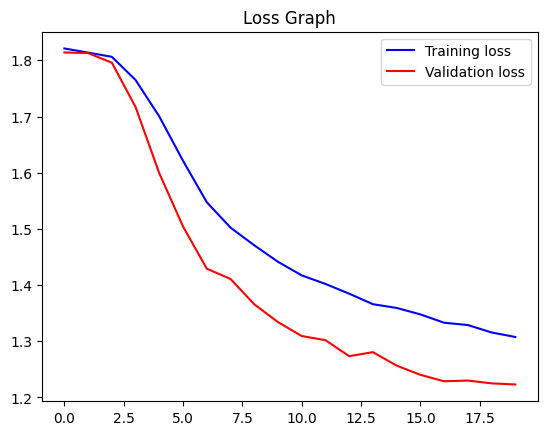

<Figure size 640x480 with 0 Axes>

In [77]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range((len(acc)))

plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs, val_acc,'r',label='Validation Accuracy')
plt.title("Accuracy Graph")
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs, val_loss,'r',label='Validation loss')
plt.title("Loss Graph")
plt.legend()
plt.figure()
plt.show()

original output: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
Prediction output: neutral


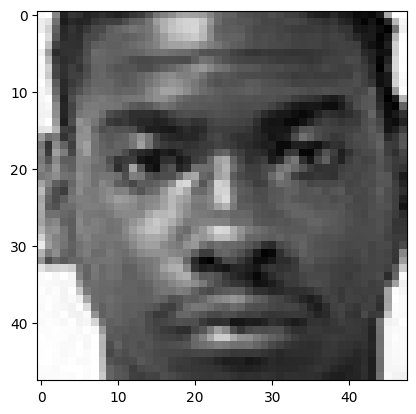

In [78]:
import random

image_index = random.randint(0, len(test))
print("original output:", test['label'][image_index])
pred = model.predict(X_test[image_index].reshape(1, 48, 48, 3))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Prediction output:", prediction_label)
plt.imshow(X_test[image_index].reshape(48, 48, 3), cmap='gray')
plt.show()

original output: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediction output: happy


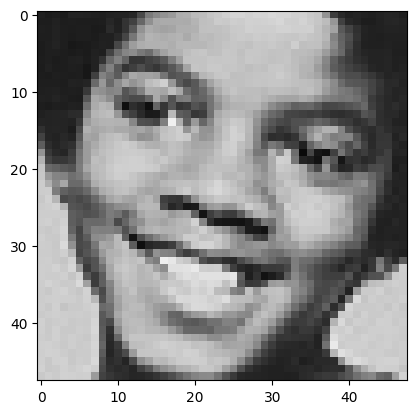

In [79]:
image_index = random.randint(0, len(test))
print("original output:", test['label'][image_index])
pred = model.predict(X_test[image_index].reshape(1, 48, 48, 3))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Prediction output:", prediction_label)
plt.imshow(X_test[image_index].reshape(48, 48, 3), cmap='viridis')  
plt.show()